In [121]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [122]:
nodes = ['4-4-4','4-8-16','16-8-4','8-8-8','4-16-32','32-16-4','16-16-16','16-32-64','64-32-16','32-32-32']

In [123]:
epochs_required = pd.read_excel("Epochs required.xlsx")
opts = epochs_required.keys()[3:]

In [124]:
archs = os.listdir("./logdir")

In [125]:
map = {}
for nn in nodes:
    # [0].find('4-8-16')
    map[nn] = []
    for arch in archs:
        if(arch.find(nn) != -1):
            map[nn].append(arch)
    map[nn].sort()

In [126]:
for i in range(10):
    epochs_ran = []
    for arch in map[nodes[i]]:
        # print(os.listdir("./logdir/" + arch + "/train")[0])
        summaries = tf.compat.v1.train.summary_iterator("./logdir/" + arch + "/train/" + os.listdir("./logdir/" + arch + "/train")[0])
        epochs = -1
        for e in summaries:
            for v in e.summary.value:
                # print("v.tag = {}".format(v.tag))
                if v.tag == 'epoch_loss':
                    epochs += 1
        epochs_ran.append(epochs)
    for count, key in enumerate(opts):
        epochs_required.at[i,key] = epochs_ran[count]
    # plt.bar(opts, epochs_ran, )
    # plt.title("Architecture - {}".format(nodes[i]))
    # plt.xlabel("Optimizers")
    # plt.ylabel("Epochs")
    # plt.grid(True)
    # plt.show()
    # plt.close()
    fig, ax = plt.subplots()

    # Save the chart so we can loop through the bars below.
    bars = ax.bar(
        x=np.arange(7),
        height=epochs_ran,
        tick_label=opts
    )
    # Axis formatting.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    ax.tick_params(bottom=False, left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#EEEEEE')
    ax.xaxis.grid(False)

    # Add text annotations to the top of the bars.
    bar_color = bars[0].get_facecolor()
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.3,
            round(bar.get_height(), 1),
            horizontalalignment='center',
            color=bar_color,
            weight='bold'
        )

    # Add labels and a title. Note the use of `labelpad` and `pad` to add some
    # extra space between the text and the tick labels.
    ax.set_xlabel('Optimizer', labelpad=15, color='#333333')
    ax.set_ylabel('Epochs', labelpad=15, color='#333333')
    ax.set_title("Architecture - {}".format(nodes[i]), pad=15, color='#333333',
                weight='bold')

    fig.tight_layout()
    # plt.show()
    plt.savefig("./performance/{}.jpg".format(nodes[i]))
    plt.close()

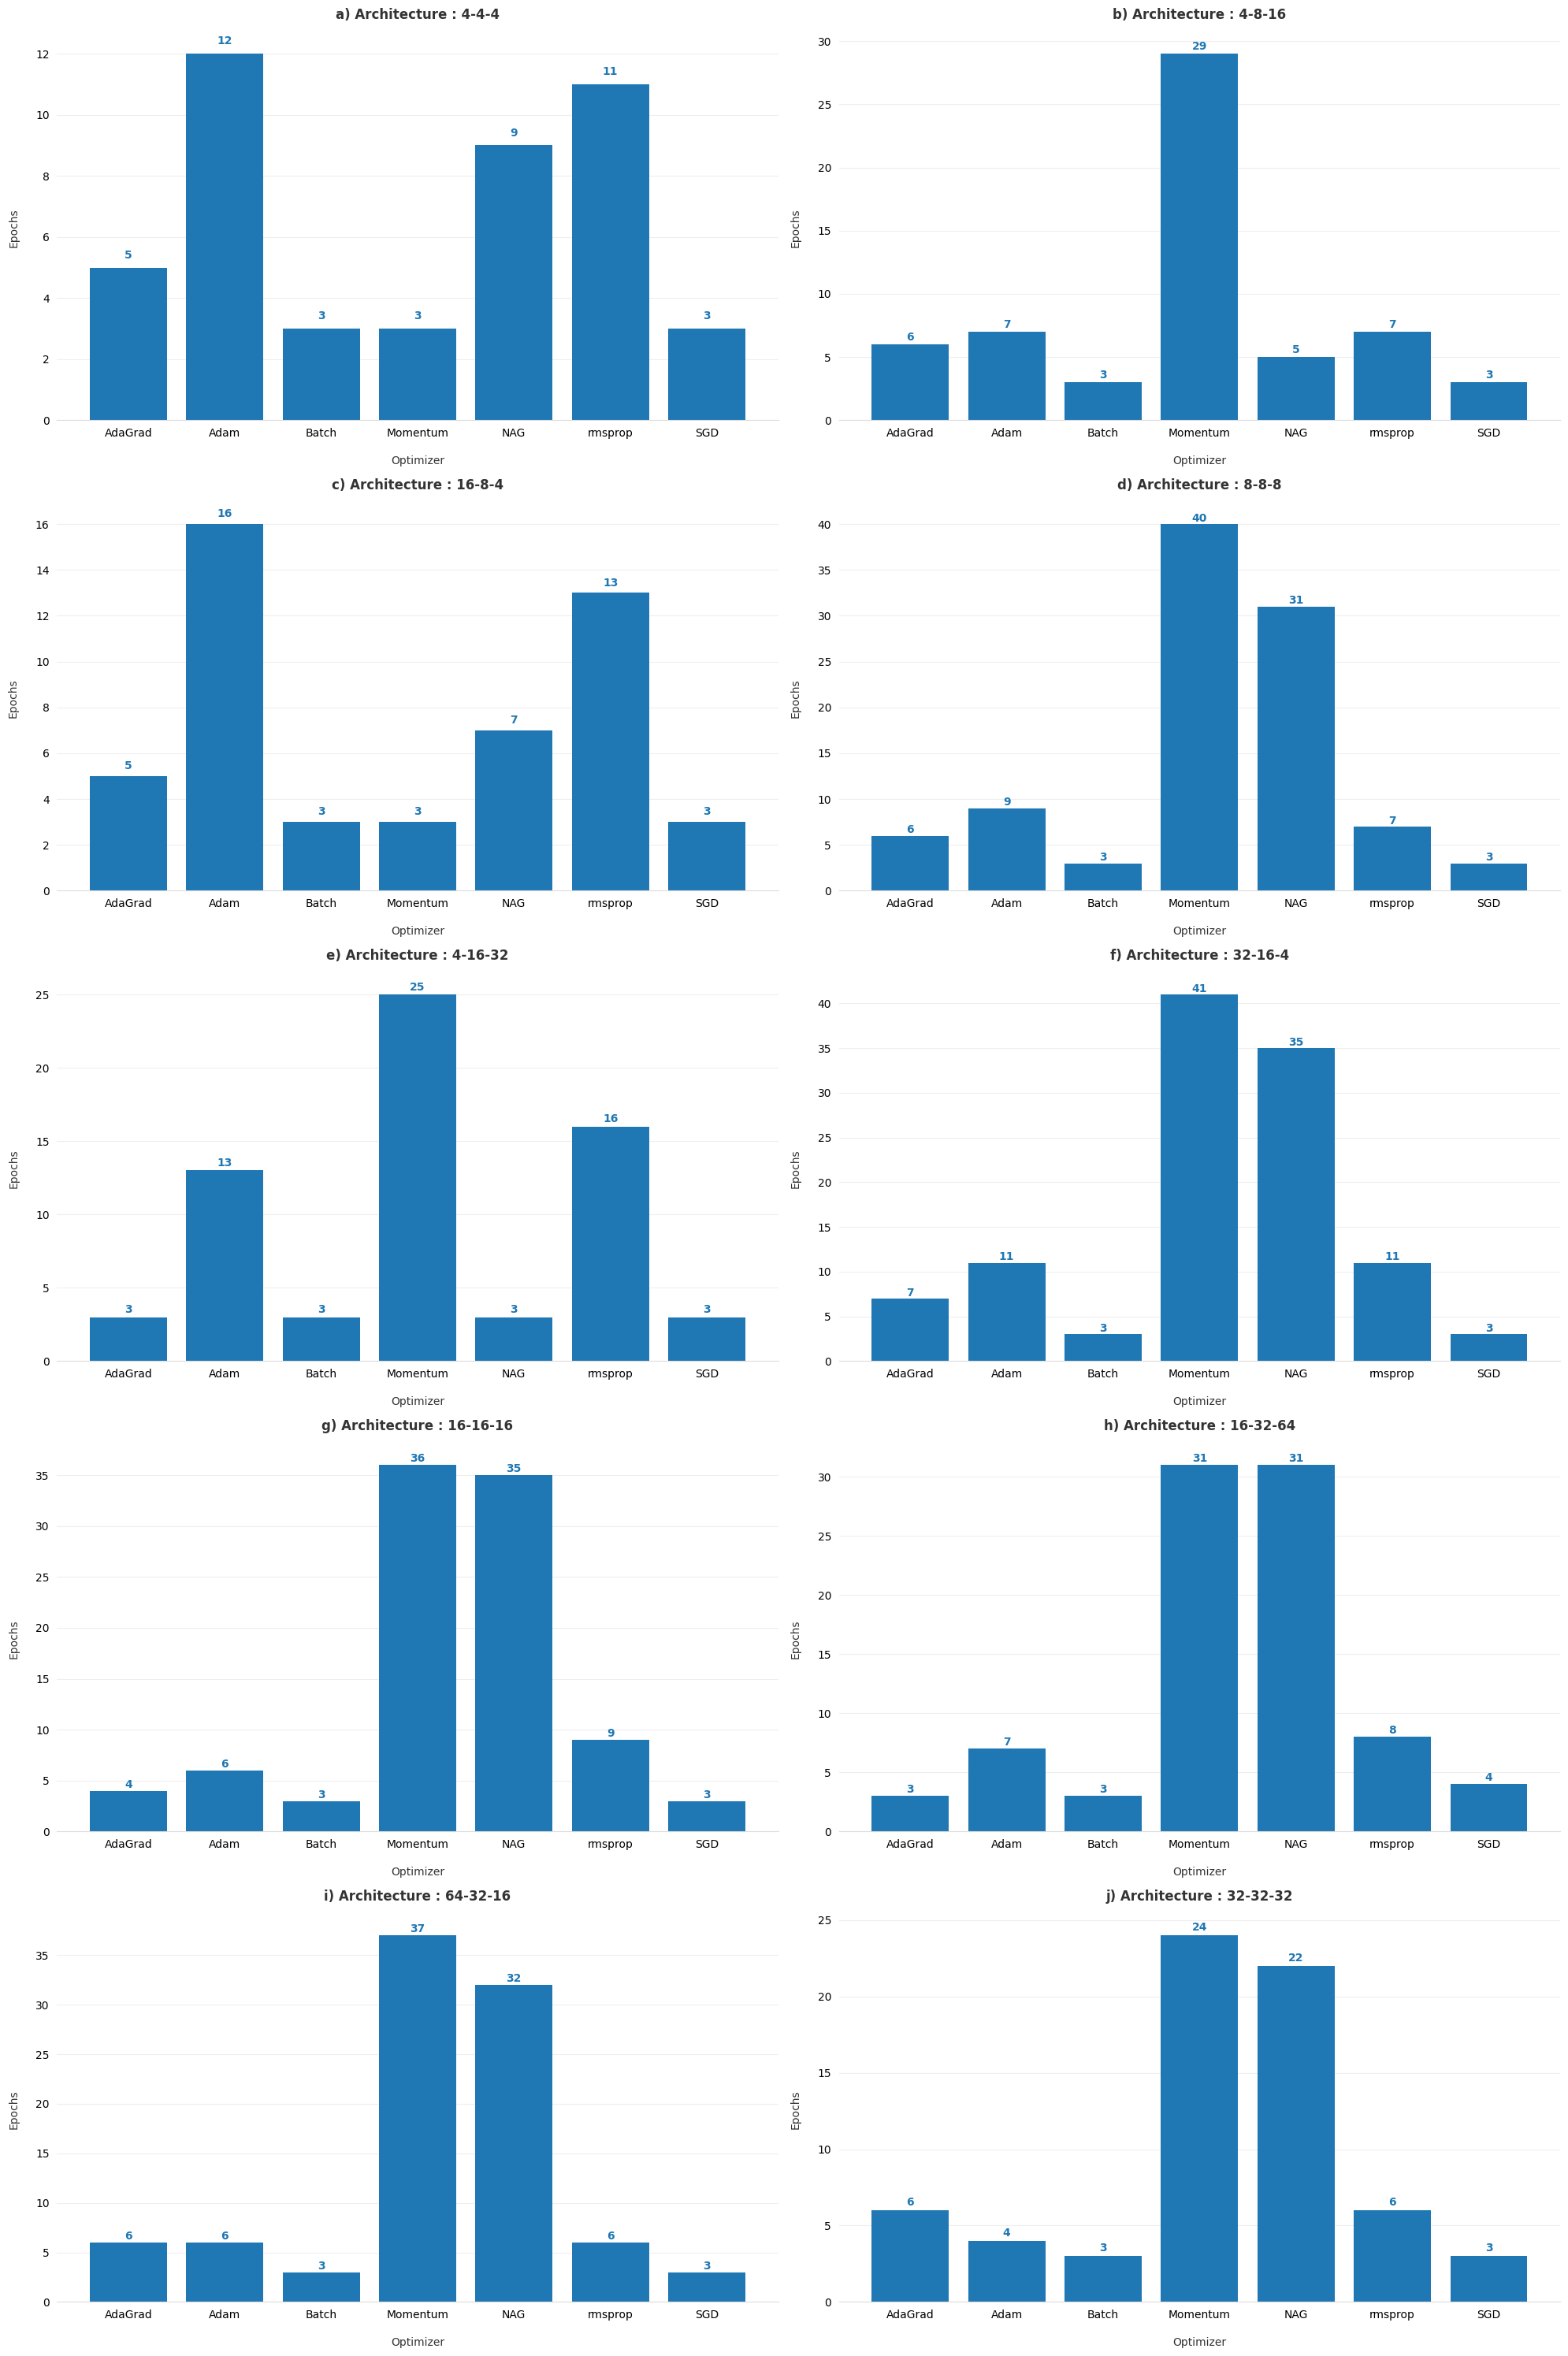

In [127]:
fig, ax = plt.subplots(5,2, figsize=(20,30))

for i in range(10):
    epochs_ran = []
    for arch in map[nodes[i]]:
        # print(os.listdir("./logdir/" + arch + "/train")[0])
        summaries = tf.compat.v1.train.summary_iterator("./logdir/" + arch + "/train/" + os.listdir("./logdir/" + arch + "/train")[0])
        epochs = -1
        for e in summaries:
            for v in e.summary.value:
                # print("v.tag = {}".format(v.tag))
                if v.tag == 'epoch_loss':
                    epochs += 1
        epochs_ran.append(epochs)
    for count, key in enumerate(opts):
        epochs_required.at[i,key] = epochs_ran[count]

    # Save the chart so we can loop through the bars below.
    # [(i/2)-1][i%2]
    # print(i/2, " ", i%2)
    bars = ax[int(i/2)][i%2].bar(
        x=np.arange(7),
        height=epochs_ran,
        tick_label=opts,
    )
    # Axis formatting.
    ax[int(i/2)][i%2].spines['top'].set_visible(False)
    ax[int(i/2)][i%2].spines['right'].set_visible(False)
    ax[int(i/2)][i%2].spines['left'].set_visible(False)
    ax[int(i/2)][i%2].spines['bottom'].set_color('#DDDDDD')
    ax[int(i/2)][i%2].tick_params(bottom=False, left=False)
    ax[int(i/2)][i%2].set_axisbelow(True)
    ax[int(i/2)][i%2].yaxis.grid(True, color='#EEEEEE')
    ax[int(i/2)][i%2].xaxis.grid(False)

    # Add text annotations to the top of the bars.
    bar_color = bars[0].get_facecolor()
    for bar in bars:
        ax[int(i/2)][i%2].text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.3,
            round(bar.get_height(), 1),
            horizontalalignment='center',
            color=bar_color,
            weight='bold'
        )

    # Add labels and a title. Note the use of `labelpad` and `pad` to add some
    # extra space between the text and the tick labels.
    ax[int(i/2)][i%2].set_xlabel('Optimizer', labelpad=15, color='#333333')
    ax[int(i/2)][i%2].set_ylabel('Epochs', labelpad=15, color='#333333')
    ax[int(i/2)][i%2].set_title("{}) Architecture : {}".format(chr(97+i),nodes[i]), pad=15, color='#333333',
                weight='bold')

    fig.tight_layout()
    # plt.show()
    # plt.savefig("./performance/{}.jpg".format(nodes[i]))
    # plt.close()
plt.show()

In [120]:
epochs_required.to_excel("./epochs_required.xlsx")

In [ ]:
for i in len(10):
    plt.bar(opts, )